In [41]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *


In [42]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite 2')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [43]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [44]:
df.shape

(183978, 42)

In [45]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [47]:
#is any row NULL ?
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [ ]:
df.isnull?

In [48]:
#is any row NULL ?
df.isna().any().any(), df.shape

(True, (183978, 42))

In [49]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [50]:
df.isnull()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183975,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183976,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().axis=0

In [ ]:
df.isnull().sum(axis=0)

In [ ]:
df.isnull(0)

In [ ]:
df.isnull().sum(axis=0)?

In [51]:
# Take initial # of rows
rows = df.shape[0]

# Drop the NULL rows
df = df.dropna()

In [52]:
df.shape

(180354, 42)

In [53]:
Nulls = rows - df.shape[0]

In [54]:
Nulls

3624

In [55]:
#Shuffle the rows of df so we get a distributed sample when we display top few rows

df = df.reindex(np.random.permutation(df.index))

In [56]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
59554,59555,160774,30995,2013-08-23 00:00:00,81.0,81.0,right,medium,low,62.0,...,70.0,85.0,15.0,13.0,22.0,11.0,6.0,8.0,6.0,7.0
60287,60288,174732,50373,2007-08-30 00:00:00,69.0,67.0,right,medium,high,57.0,...,63.0,52.0,70.0,65.0,59.0,8.0,10.0,15.0,5.0,12.0
141341,141342,219661,480964,2014-03-28 00:00:00,51.0,64.0,left,medium,medium,30.0,...,27.0,36.0,51.0,62.0,57.0,7.0,14.0,9.0,8.0,12.0
144335,144336,197965,186748,2007-02-22 00:00:00,61.0,68.0,right,medium,medium,46.0,...,59.0,62.0,27.0,31.0,39.0,5.0,24.0,45.0,24.0,24.0
67196,67197,188816,154949,2013-03-28 00:00:00,73.0,78.0,right,high,high,46.0,...,68.0,55.0,64.0,76.0,70.0,11.0,9.0,14.0,12.0,10.0


In [58]:
df[:15][['penalties', 'overall_rating','finishing']]


,penalties,overall_rating,finishing
59554,85.0,81.0,86.0
60287,52.0,69.0,62.0
141341,36.0,51.0,25.0
144335,62.0,61.0,67.0
67196,55.0,73.0,55.0
78349,55.0,65.0,45.0
176495,46.0,68.0,61.0
119893,52.0,66.0,25.0
44252,46.0,70.0,36.0
100944,46.0,65.0,43.0


In [59]:
df['overall_rating'].corr(df['penalties'])

0.3927151079111886

In [64]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina','finishing']


In [65]:
# check how the features are correlated with the overall ratings

for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606
finishing: 0.330079


In [66]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [67]:
# check how the features are correlated with the overall ratings
#Creo que el error es que estoy dejando todos los numeros en un valor (no es un arreglo o lista)
for f in cols:
    correlations = df['overall_rating'].corr(df[f])

In [68]:
len(cols), len(correlations)

TypeError: object of type 'numpy.float64' has no len()

In [69]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in cols
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [70]:
len(cols), len(correlations)

(34, 34)

In [71]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df2.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df2.index)
    ax.set_xticklabels(df2.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

In [72]:
# create a dataframe using cols and correlations

df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

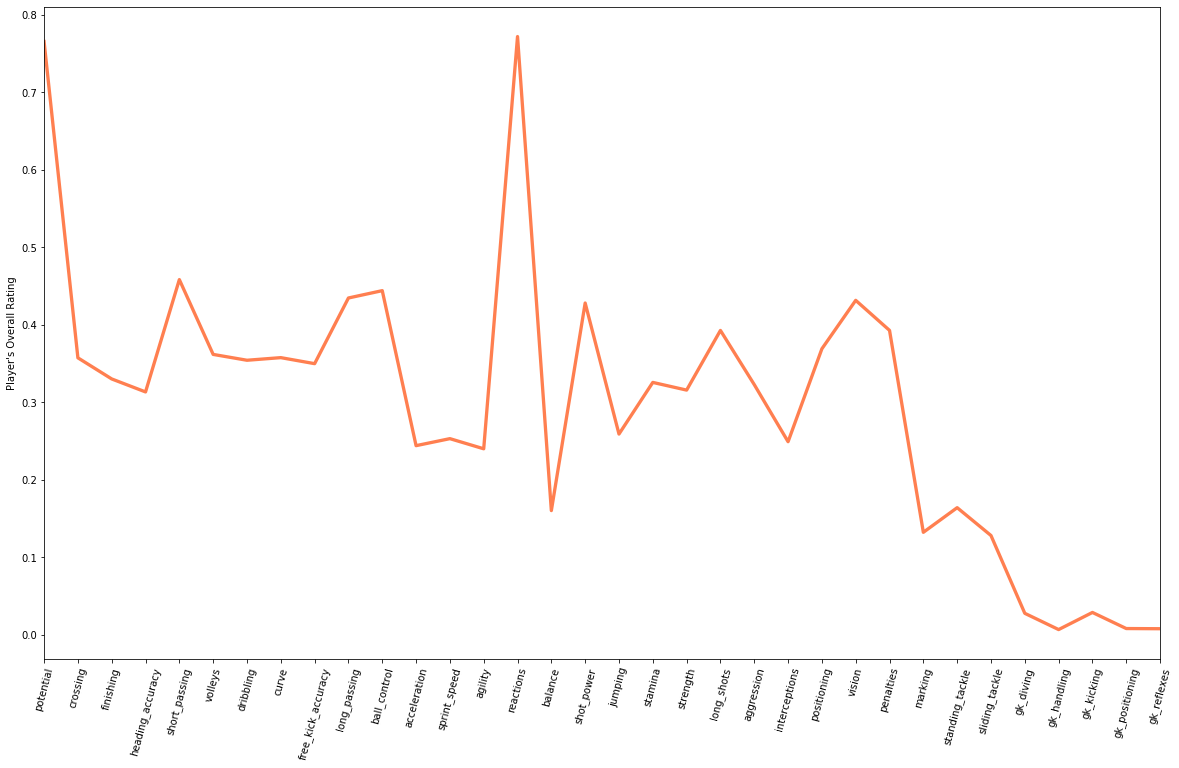

In [73]:
# let's plot above dataframe using the function we created
    
plot_dataframe(df2, 'Player\'s Overall Rating')

In [74]:
# Define the features you want to use for grouping players

select5features = ['reactions', 'potential', 'long_passing', 'vision', 'short_passing']
select5features

['reactions', 'potential', 'long_passing', 'vision', 'short_passing']

In [75]:
# Generate a new dataframe by selecting the features you just defined

df_select = df[select5features].copy(deep=True)

In [76]:
df_select.head()

,reactions,potential,long_passing,vision,short_passing
59554,80.0,81.0,67.0,70.0,74.0
60287,55.0,67.0,71.0,63.0,69.0
141341,46.0,64.0,38.0,27.0,31.0
144335,66.0,68.0,45.0,59.0,46.0
67196,75.0,78.0,69.0,68.0,74.0


In [77]:
# Perform scaling on the dataframe containing the features

data = scale(df_select)

# Define number of clusters
noOfClusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [78]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    43555
1    18388
2    45556
3    72855
dtype: int64

In [79]:
# Create a composite dataframe for plotting
# ... Use custom function declared in customplot.py (which we imported at the beginning of this notebook)

P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

,reactions,potential,long_passing,vision,short_passing,prediction
0,0.995678,1.029627,0.933377,0.984942,0.953868,0
1,-0.492801,-0.288286,-1.817523,-1.745461,-2.189925,1
2,-0.949697,-0.898832,-0.441122,-0.520521,-0.388285,2
3,0.124613,0.020738,0.178393,0.179087,0.227258,3


In [80]:
# For plotting the graph inside the notebook itself, we use the following command

%matplotlib inline

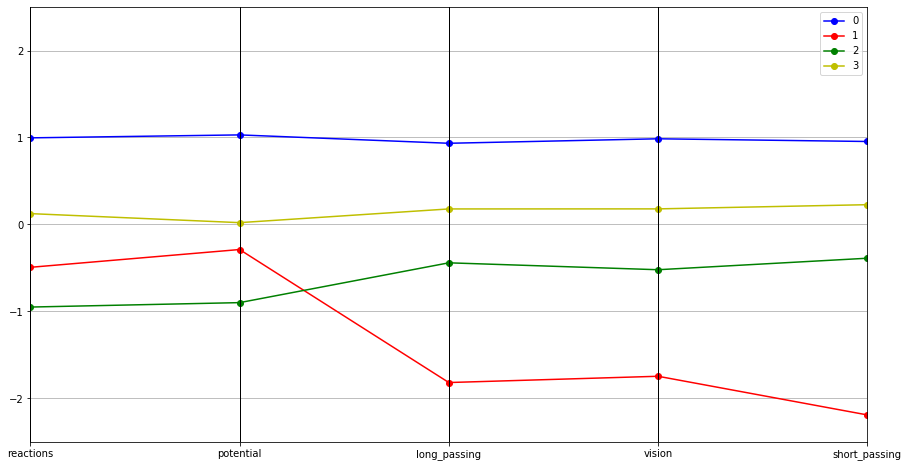

In [81]:
parallel_plot(P)